In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ndarvind/phiusiil-phishing-url-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\rrpra\.cache\kagglehub\datasets\ndarvind\phiusiil-phishing-url-dataset\versions\1


In [4]:
import os

#dataset_path = "/kaggle/input/phiusiil-phishing-url-dataset"
dataset_path = r'Dataset/'

In [5]:
files_in_dataset = os.listdir(dataset_path)

In [21]:
for file in files_in_dataset:
  print(file)
  print('*'*10)

url_test_df.csv
**********
url_train_df.csv
**********
url_validation_df.csv
**********


In [6]:
#df = pd.read_csv(os.path.join(dataset_path,"PhiUSIIL_Phishing_URL_Dataset.csv"))
df = pd.read_csv(os.path.join(dataset_path,"url_train_df.csv"))

In [23]:
df.shape

(567056, 27)

In [24]:
df.head()

,label,url,url_length,hostname_length,path_length,num_dots,num_hyphens,num_digits,num_letters,num_params,...,domain_length,in_alexa_top1m,tld,tld_phish_ratio,tld_total_frequency,digit_ratio,special_char_ratio,url_entropy,at_in_domain,double_slash_in_path
0,0,xenophongroup.com/montjoie/compgns.htm,45,17,21,2,0,0,38,0,...,17,0,com,0.396303,373979,0.000000,0.133333,3.882823,0,0
1,1,www.azzali.eu/&usg=AOvVaw2phVSb_ENMrkATGNx5LQ0l,54,13,34,2,0,3,42,0,...,9,0,eu,0.520258,1703,0.055556,0.092593,5.060262,0,0
2,1,guildmusic.edu.au/js/index.htm,37,17,13,3,0,0,29,0,...,17,0,edu.au,0.450633,395,0.000000,0.189189,4.046763,0,0
3,1,memo.unexpectedrunner.com/ezxgytw4et\nholotili...,99,25,67,5,0,1,86,0,...,20,0,com,0.396303,373979,0.010101,0.101010,4.377841,0,0
4,0,en.wikipedia.org/wiki/Category:American_televi...,63,16,40,2,0,0,53,0,...,13,1,org,0.375147,59502,0.000000,0.095238,4.404920,0,0


# COLUMN WISE INFORMATION

In [25]:
import pandas as pd

def dataframe_summary(df):
    summary = pd.DataFrame({
        "DataType": df.dtypes,
        "Non-Null Count": df.count(),
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "First Value": df.iloc[0],
        "Sample Values": df.apply(lambda x: x.unique()[:5])  # first 5 unique values
    })
    return summary

# Example usage
summary_table = dataframe_summary(df)
print(summary_table)


                     DataType  Non-Null Count  Missing Values  Unique Values  \
label                   int64          567056               0              2   
url                    object          567056               0         535838   
url_length              int64          567056               0            704   
hostname_length         int64          567056               0            243   
path_length             int64          567056               0            405   
num_dots                int64          567056               0             37   
num_hyphens             int64          567056               0             47   
num_digits              int64          567056               0            269   
num_letters             int64          567056               0            569   
num_params              int64          567056               0             17   
num_equals              int64          567056               0             29   
num_slashes             int64          5

In [26]:
df['label'].value_counts()

label
0    283813
1    283243
Name: count, dtype: int64

# Class Labels :
Label 1 corresponds to a legitimate URL, label 0 to a phishing URL



# Data Cleaning

In [27]:
df['url'].isnull().sum()

np.int64(0)

In [28]:
df['url'].duplicated().sum()

np.int64(31218)

In [33]:
df = df.drop_duplicates(subset=['URL'])

1. Before dropping the duplicates the shape fo dataset was : (235795, 55)
2. After dropping the duplicates ------------------------- : (235370, 55)



In [29]:
df.shape

(567056, 27)

Although the data is little imbalance , we may do oversampling . But as we are going for deep learning , we may just adjust class weights.

In [30]:
df.dtypes

label                     int64
url                      object
url_length                int64
hostname_length           int64
path_length               int64
num_dots                  int64
num_hyphens               int64
num_digits                int64
num_letters               int64
num_params                int64
num_equals                int64
num_slashes               int64
num_at                    int64
has_https                 int64
has_ip                    int64
has_subdomain             int64
has_suspicious_words      int64
domain_length             int64
in_alexa_top1m            int64
tld                      object
tld_phish_ratio         float64
tld_total_frequency       int64
digit_ratio             float64
special_char_ratio      float64
url_entropy             float64
at_in_domain              int64
double_slash_in_path      int64
dtype: object

In [31]:
import pandas as pd

def dataframe_summary(df):
    summary = pd.DataFrame({
        "DataType": df.dtypes,
        "Non-Null Count": df.count(),
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "First Value": df.iloc[0],
        "Sample Values": df.apply(lambda x: x.unique()[:5])  # first 5 unique values
    })
    return summary

# Example usage
summary_table = dataframe_summary(df)
print(summary_table)

                     DataType  Non-Null Count  Missing Values  Unique Values  \
label                   int64          567056               0              2   
url                    object          567056               0         535838   
url_length              int64          567056               0            704   
hostname_length         int64          567056               0            243   
path_length             int64          567056               0            405   
num_dots                int64          567056               0             37   
num_hyphens             int64          567056               0             47   
num_digits              int64          567056               0            269   
num_letters             int64          567056               0            569   
num_params              int64          567056               0             17   
num_equals              int64          567056               0             29   
num_slashes             int64          5

In [7]:
y = df['label']
X = df.drop(columns =["url","label"])


# Relation between independent and dependent variables

tld_phish_ratio         0.378507
has_subdomain           0.299981
num_dots                0.236735
hostname_length         0.180432
has_suspicious_words    0.157396
special_char_ratio      0.108034
has_ip                  0.090950
has_https               0.065377
num_at                  0.064036
digit_ratio             0.059254
dtype: float64


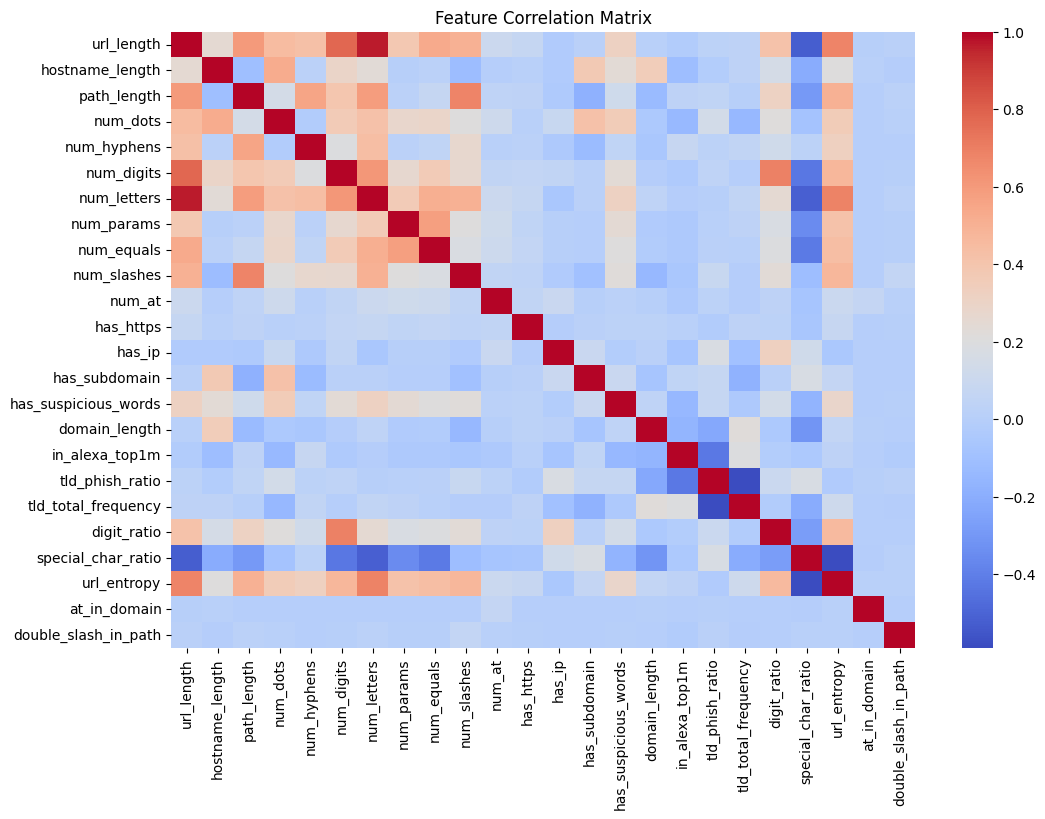

In [33]:
numeric_features = X.select_dtypes(include=['int64', 'float64'])

# Compute correlation with target
corr = numeric_features.corrwith(y)

# Show top 10 features most correlated
print(corr.sort_values(ascending=False).head(10))

# Optional: heatmap of all correlations
plt.figure(figsize=(12,8))
sns.heatmap(numeric_features.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [35]:
# Example: check counts per category for the label
#pd.crosstab(X['TLD'], y)


In [56]:
from scipy.stats import chi2_contingency

chi2, p, dof, ex = chi2_contingency(pd.crosstab(X['TLD'], y))
print("p-value:", p)


p-value: 0.0


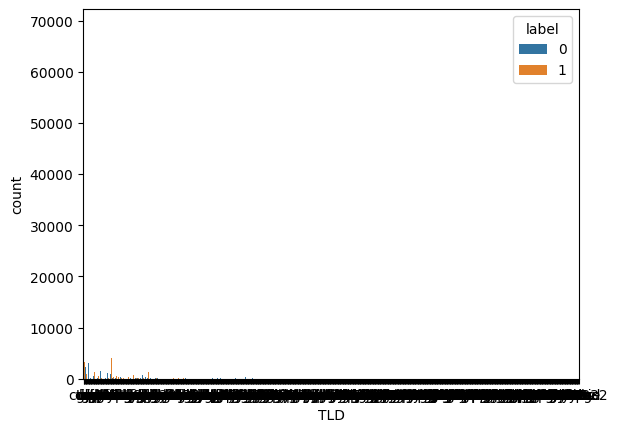

In [57]:
sns.countplot(x='TLD', hue=y, data=X.join(y))
plt.show()


In [63]:
object_features = df.select_dtypes(include=['object'])

object_features.nunique()


,0
URL,235370
Domain,220086
TLD,695
Title,197782


In [ ]:
X = X.drop(columns =['Domain','Title'])

In [65]:
common = ['com', 'net', 'org']
country_codes = ['uk', 'in', 'us', 'de', 'fr']  # add more if you want

def tld_group(tld):
    if tld in common:
        return 'common'
    elif tld in country_codes:
        return 'country'
    else:
        return 'rare'

X['TLD_group'] = X['TLD'].apply(tld_group)
X = pd.get_dummies(X, columns=['TLD_group'])
X = X.drop(columns=['TLD'])  # drop original


In [40]:
X

,url_length,hostname_length,path_length,num_dots,num_hyphens,num_digits,num_letters,num_params,num_equals,num_slashes,...,has_suspicious_words,domain_length,in_alexa_top1m,tld_phish_ratio,tld_total_frequency,digit_ratio,special_char_ratio,url_entropy,at_in_domain,double_slash_in_path
0,45,17,21,2,0,0,38,0,0,4,...,0,17,0,0.396303,373979,0.000000,0.133333,3.882823,0,0
1,54,13,34,2,0,3,42,0,1,3,...,0,9,0,0.520258,1703,0.055556,0.092593,5.060262,0,0
2,37,17,13,3,0,0,29,0,0,4,...,0,17,0,0.450633,395,0.000000,0.189189,4.046763,0,0
3,99,25,67,5,0,1,86,0,0,5,...,0,20,0,0.396303,373979,0.010101,0.101010,4.377841,0,0
4,63,16,40,2,0,0,53,0,0,4,...,0,13,1,0.375147,59502,0.000000,0.095238,4.404920,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567051,61,20,34,3,0,0,49,0,0,4,...,0,13,1,0.375147,59502,0.000000,0.114754,4.334277,0,0
567052,99,5,28,2,4,8,76,1,0,6,...,1,5,0,0.990331,6516,0.080808,0.121212,4.622719,0,0
567053,77,16,16,3,0,10,57,1,1,4,...,1,12,0,0.629609,3661,0.129870,0.090909,4.944833,0,0
567054,21,14,0,2,0,0,16,0,0,2,...,0,6,1,0.119706,3542,0.000000,0.190476,3.784942,0,0


In [41]:
X.dtypes

url_length                int64
hostname_length           int64
path_length               int64
num_dots                  int64
num_hyphens               int64
num_digits                int64
num_letters               int64
num_params                int64
num_equals                int64
num_slashes               int64
num_at                    int64
has_https                 int64
has_ip                    int64
has_subdomain             int64
has_suspicious_words      int64
domain_length             int64
in_alexa_top1m            int64
tld_phish_ratio         float64
tld_total_frequency       int64
digit_ratio             float64
special_char_ratio      float64
url_entropy             float64
at_in_domain              int64
double_slash_in_path      int64
dtype: object

We are gonna do k-fold stratified classification..

# Model build:

Step 1: Stratified K-Fold Initialization

In [17]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from xgboost import XGBClassifier

In [43]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


Step 2: Model Initialization


In [44]:
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)


Step 3: Loop Through Folds

In [45]:
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

In [46]:
for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))

c:\Users\rrpra\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:27:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\rrpra\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:27:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\rrpra\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:27:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\rrpra\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:27:39] WARNING: C:\actio

In [47]:
print("✅ XGBoost with Stratified 5-Fold CV")
print(f"Accuracy:  {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"F1 Score:  {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
print(f"Recall:    {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")

✅ XGBoost with Stratified 5-Fold CV
Accuracy:  0.8548 ± 0.0006
F1 Score:  0.8589 ± 0.0007
Precision: 0.8349 ± 0.0007
Recall:    0.8843 ± 0.0013


In [48]:
for col in X.columns:
    correlation = X[col].corr(y)
    if abs(correlation) > 0.99:  # suspiciously high
        print(col, correlation)

# Only using normal train_test_split:

In [13]:
from sklearn.model_selection import train_test_split

In [50]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [51]:
model1 = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

In [52]:
model1.fit(X_train1,y_train1)

c:\Users\rrpra\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:28:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [53]:
y_pred1 = model.predict(X_test1)

In [54]:
accuracy_score1 = accuracy_score(y_test1, y_pred1)

In [55]:
accuracy_score1

0.8575900257468345

In [16]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(model, max_num_features=20, importance_type='gain')
plt.show()


NameError: name 'model' is not defined

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

In [59]:
model_rf = rf_model.fit(X_train1,y_train1)

In [60]:
y_pred_rf = model_rf.predict(X_test1)

In [61]:
accuracy_rf = accuracy_score(y_test1, y_pred_rf)

In [62]:
accuracy_rf

0.8581455225196628

In [63]:
rf_model2 = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

In [64]:
model_rf_2 = rf_model2.fit(X_train1,y_train1)

In [65]:
y_pred_rf_2 = model_rf_2.predict(X_test1)

In [66]:
accuracy_rf2 = accuracy_score(y_pred_rf_2,y_test1)

In [67]:
accuracy_rf2

0.8435438930624626

In [68]:
print("f1_score :",f1_score(y_test1, y_pred_rf_2))
print("recall :",recall_score(y_test1, y_pred_rf_2))
print("precision :",precision_score(y_test1, y_pred_rf_2))

f1_score : 0.8450982103884767
recall : 0.8544369715264171
precision : 0.8359613823595448


In [69]:
for col in X.columns:
    print(col, X[col].nunique())

url_length 704
hostname_length 243
path_length 405
num_dots 37
num_hyphens 47
num_digits 269
num_letters 569
num_params 17
num_equals 29
num_slashes 36
num_at 7
has_https 2
has_ip 2
has_subdomain 2
has_suspicious_words 2
domain_length 76
in_alexa_top1m 2
tld_phish_ratio 348
tld_total_frequency 252
digit_ratio 14303
special_char_ratio 6899
url_entropy 149940
at_in_domain 2
double_slash_in_path 2


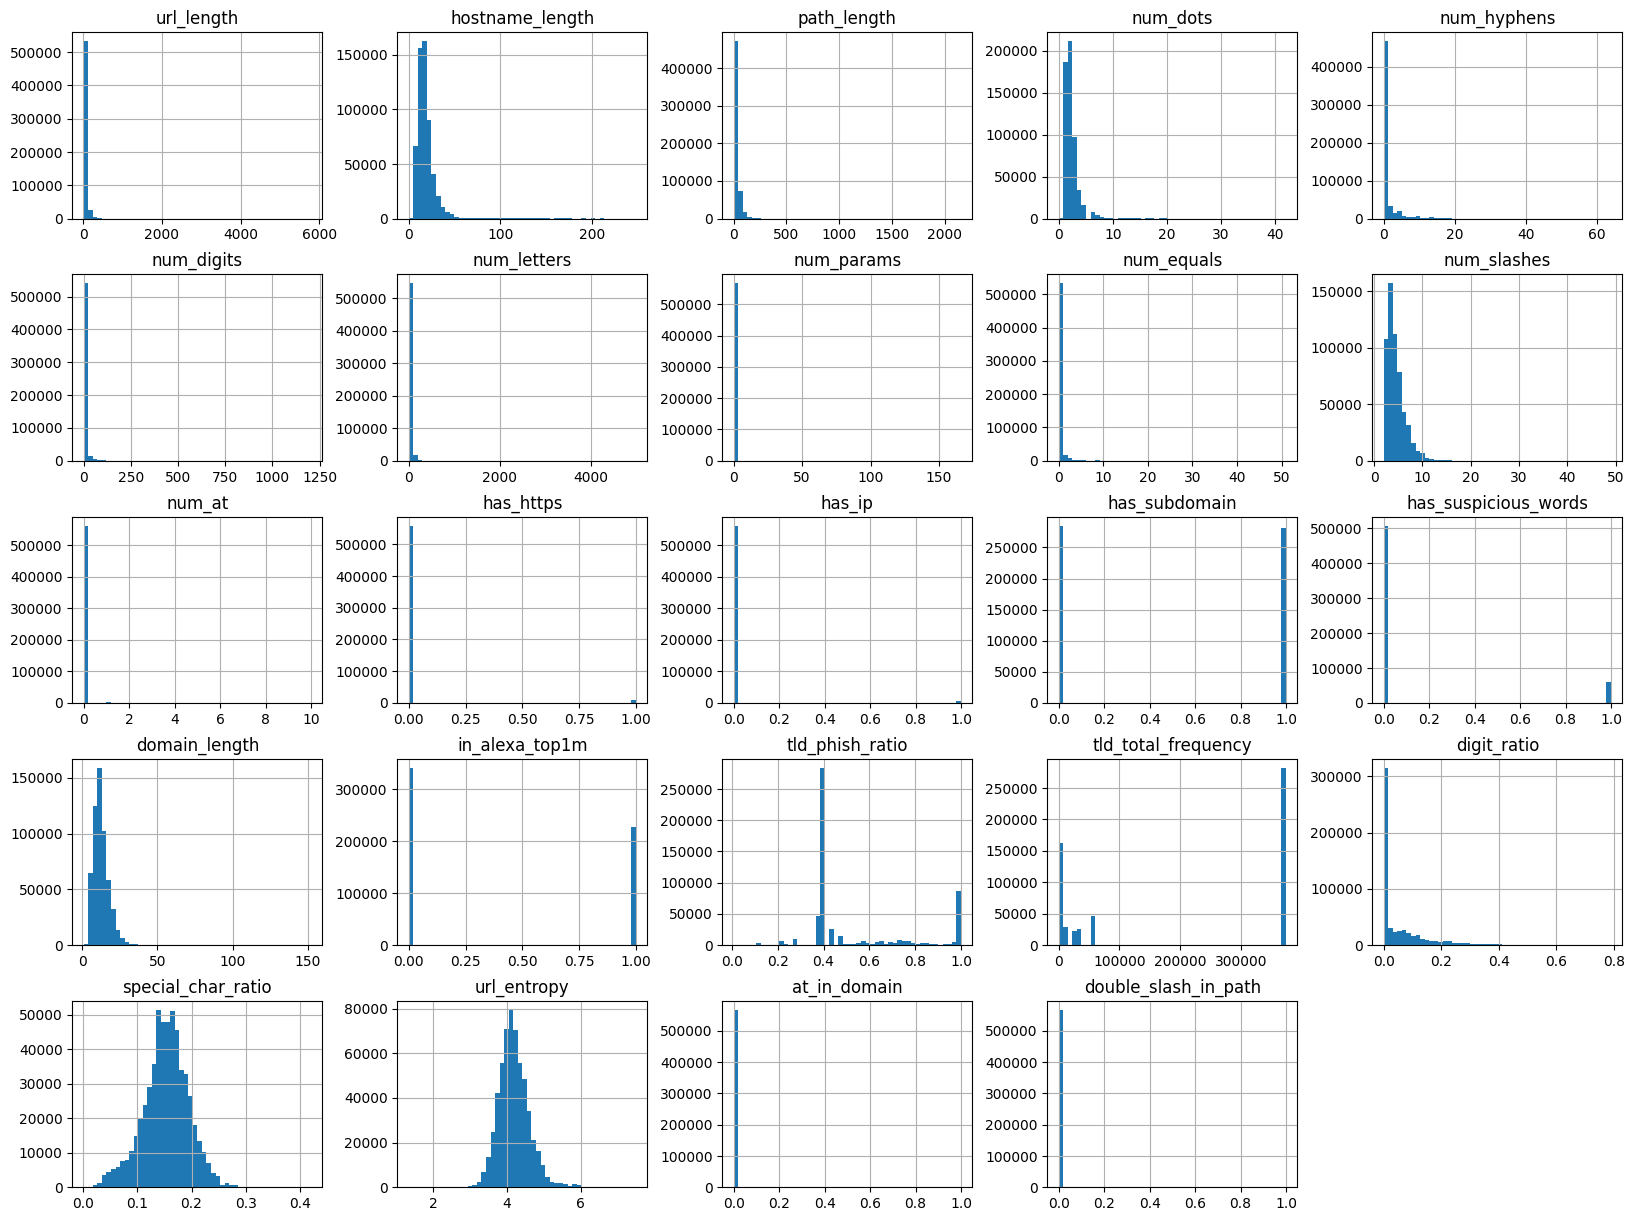

In [70]:
X.hist(figsize=(20,15), bins=50)
plt.show()


In [72]:
df_numeric = df.select_dtypes(include=['number'])

corr_matrix = df_numeric.corr()
corr_matrix.style.background_gradient(cmap='RdYlGn')

,label,url_length,hostname_length,path_length,num_dots,num_hyphens,num_digits,num_letters,num_params,num_equals,num_slashes,num_at,has_https,has_ip,has_subdomain,has_suspicious_words,domain_length,in_alexa_top1m,tld_phish_ratio,tld_total_frequency,digit_ratio,special_char_ratio,url_entropy,at_in_domain,double_slash_in_path
label,1.000000,0.019567,0.180432,-0.122939,0.236735,-0.180080,0.045631,0.015814,0.034655,0.027237,0.030159,0.064036,0.065377,0.090950,0.299981,0.157396,0.022560,-0.434286,0.378507,-0.232386,0.059254,0.108034,0.038540,0.004353,0.014943
url_length,0.019567,1.000000,0.251823,0.602071,0.447576,0.425503,0.780036,0.965193,0.384359,0.531558,0.497096,0.099965,0.074458,-0.025842,0.015587,0.321908,0.007929,-0.019663,0.029500,0.032299,0.411619,-0.527330,0.683268,0.000499,0.018343
hostname_length,0.180432,0.251823,1.000000,-0.106803,0.525085,0.020540,0.295096,0.233165,0.005744,0.020650,-0.121296,-0.003766,0.012434,-0.026036,0.375027,0.241262,0.349746,-0.111922,-0.012513,0.032825,0.152612,-0.205553,0.208736,0.009585,-0.007316
path_length,-0.122939,0.602071,-0.106803,1.000000,0.147133,0.557946,0.393801,0.585392,0.024239,0.072258,0.677212,0.042963,0.033270,-0.033608,-0.180429,0.119475,-0.134134,0.032597,0.048105,0.003008,0.313048,-0.292112,0.497808,-0.004194,0.024454
num_dots,0.236735,0.447576,0.525085,0.147133,1.000000,-0.022387,0.361122,0.416518,0.277355,0.291242,0.211342,0.113220,0.007694,0.083748,0.421107,0.358068,-0.047887,-0.141274,0.143033,-0.147386,0.213796,-0.085493,0.358473,-0.002552,0.011352
num_hyphens,-0.180080,0.425503,0.020540,0.557946,-0.022387,1.000000,0.193982,0.440237,0.020223,0.045551,0.272472,0.010067,0.024805,-0.037375,-0.129046,0.048650,-0.058050,0.076349,0.030976,0.050991,0.125259,0.027959,0.327382,-0.000873,-0.002307
num_digits,0.045631,0.780036,0.295096,0.393801,0.361122,0.193982,1.000000,0.609722,0.267134,0.361280,0.262766,0.050408,0.056792,0.054773,0.012825,0.240354,-0.008273,-0.036734,0.038192,0.000267,0.694464,-0.431510,0.478194,-0.000981,0.004038
num_letters,0.015814,0.965193,0.233165,0.585392,0.416518,0.440237,0.609722,1.000000,0.364628,0.510909,0.497292,0.099891,0.073625,-0.058840,0.018883,0.317079,0.040907,-0.010086,0.006011,0.054005,0.251151,-0.519271,0.684349,-0.000865,0.020075
num_params,0.034655,0.384359,0.005744,0.024239,0.277355,0.020223,0.267134,0.364628,1.000000,0.579002,0.207321,0.121404,0.049356,0.003192,-0.004193,0.243298,-0.025147,-0.041444,0.008755,0.036579,0.179895,-0.348795,0.412229,-0.001312,0.003290
num_equals,0.027237,0.531558,0.020650,0.072258,0.291242,0.045551,0.361280,0.510909,0.579002,1.000000,0.182027,0.108012,0.057573,0.000591,-0.002158,0.210820,-0.023081,-0.037219,0.014344,0.011294,0.195301,-0.420162,0.438869,-0.000784,0.002938


In [75]:
correlation_with_target = corr_matrix["label"].drop("label") #extracts the column of correlations between all features and the target variable (label)
print("Correlation with target:\n", correlation_with_target.sort_values())

Correlation with target:
 in_alexa_top1m         -0.434286
tld_total_frequency    -0.232386
num_hyphens            -0.180080
path_length            -0.122939
at_in_domain            0.004353
double_slash_in_path    0.014943
num_letters             0.015814
url_length              0.019567
domain_length           0.022560
num_equals              0.027237
num_slashes             0.030159
num_params              0.034655
url_entropy             0.038540
num_digits              0.045631
digit_ratio             0.059254
num_at                  0.064036
has_https               0.065377
has_ip                  0.090950
special_char_ratio      0.108034
has_suspicious_words    0.157396
hostname_length         0.180432
num_dots                0.236735
has_subdomain           0.299981
tld_phish_ratio         0.378507
Name: label, dtype: float64


In [76]:
# Identify features with low correlation to the target (e.g., abs(correlation) < 0.5)
low_correlation_features = correlation_with_target[correlation_with_target.abs() < 0.5].index.tolist()

#abs() method in Python is used to calculate the absolute value of numbers. In the context of a Pandas Series or DataFrame, it
#computes the absolute value of each element, ensuring all values are non-negative.

print("Low correlation features:", low_correlation_features)

Low correlation features: ['url_length', 'hostname_length', 'path_length', 'num_dots', 'num_hyphens', 'num_digits', 'num_letters', 'num_params', 'num_equals', 'num_slashes', 'num_at', 'has_https', 'has_ip', 'has_subdomain', 'has_suspicious_words', 'domain_length', 'in_alexa_top1m', 'tld_phish_ratio', 'tld_total_frequency', 'digit_ratio', 'special_char_ratio', 'url_entropy', 'at_in_domain', 'double_slash_in_path']


In [124]:
new_X = df.drop(columns= ['URL','Domain','Title','URLLength', 'DomainLength', 'IsDomainIP', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'HasFavicon', 'Robots', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef','label'])

In [10]:
new_y = df['label']

In [26]:
new_X.dtypes

url_length                int64
hostname_length           int64
path_length               int64
num_dots                  int64
num_hyphens               int64
num_digits                int64
num_letters               int64
num_params                int64
num_equals                int64
num_slashes               int64
num_at                    int64
has_https                 int64
has_ip                    int64
has_subdomain             int64
has_suspicious_words      int64
domain_length             int64
in_alexa_top1m            int64
tld_phish_ratio         float64
tld_total_frequency       int64
digit_ratio             float64
special_char_ratio      float64
url_entropy             float64
at_in_domain              int64
double_slash_in_path      int64
dtype: object

In [128]:
new_X['TLD'].nunique()

695

In [129]:
common = ['com', 'net', 'org']
country_codes = ['uk', 'in', 'us', 'de', 'fr']  # add more if you want

def tld_group(tld):
    if tld in common:
        return 'common'
    elif tld in country_codes:
        return 'country'
    else:
        return 'rare'

new_X['TLD_group'] = new_X['TLD'].apply(tld_group)
new_X = pd.get_dummies(new_X, columns=['TLD_group'])
new_X = new_X.drop(columns=['TLD'])  # drop original

In [25]:
new_X = X


In [27]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    new_X, new_y, test_size=0.2, stratify=y, random_state=42
)

In [28]:
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

In [29]:
xgb_model = xgb_model.fit(X_train_xgb,y_train_xgb)

c:\Users\rrpra\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:40:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [30]:
y_pred_xgb = xgb_model.predict(X_test_xgb)

In [31]:
print("Accuracy : ",accuracy_score(y_test_xgb,y_pred_xgb))
print("F1-score : ",f1_score(y_test_xgb, y_pred_xgb))
print("Recall : ",recall_score(y_test_xgb,y_pred_xgb))
print("Precision : ",precision_score(y_test_xgb,y_pred_xgb))

Accuracy :  0.8566994674284908
F1-score :  0.8608680763633251
Recall :  0.8875531783438366
Precision :  0.8357407622878609


In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [33]:
cm = confusion_matrix(y_pred_xgb, y_test_xgb)
print(cm)

[[46881  6370]
 [ 9882 50279]]


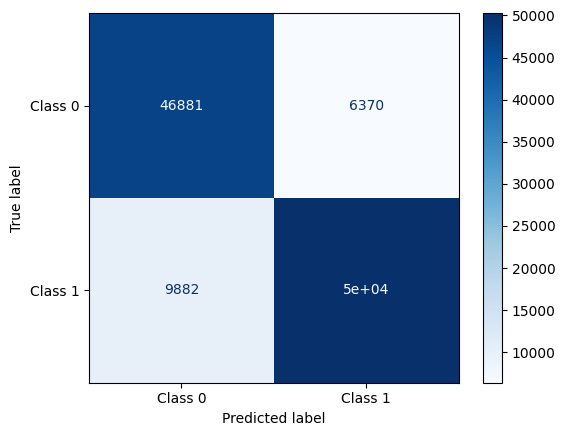

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)  # Optional: color map
plt.show()

In [35]:
X_test_xgb.shape

(113412, 24)

c:\Users\rrpra\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


<Figure size 2000x1000 with 0 Axes>

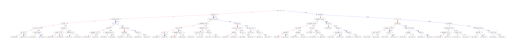

In [36]:
import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt

# Assuming your model is trained as `model`
plt.figure(figsize=(20,10))  # increase size for readability
plot_tree(xgb_model, num_trees=0)  # num_trees=0 means the first tree
plt.show()


<Figure size 1000x600 with 0 Axes>

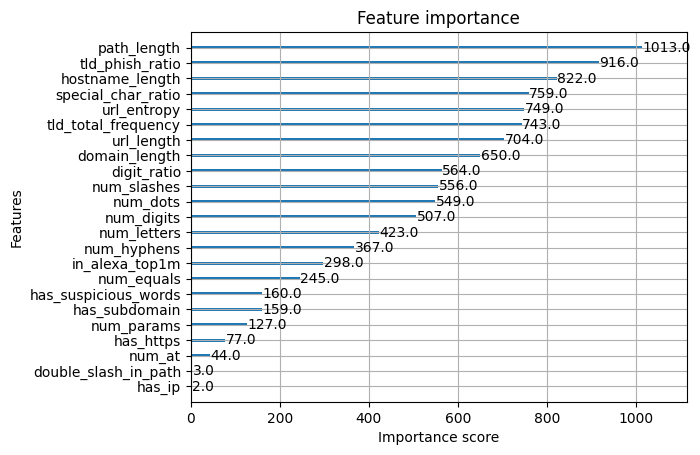

In [37]:
from xgboost import plot_importance

plt.figure(figsize=(10,6))
plot_importance(xgb_model, importance_type='weight')  # or 'gain', 'cover'
plt.show()


c:\Users\rrpra\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


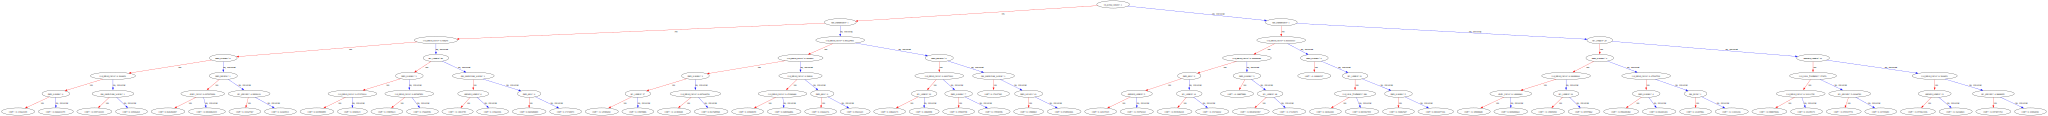

In [38]:
import xgboost as xgb

xgb.to_graphviz(xgb_model, num_trees=0)  # requires graphviz installed
